<a href="https://colab.research.google.com/github/pankajti/wqu/blob/main/portfolio_gwp1_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1

Fema french 5 factors model

* Rm-Rf
* SMB
* HML
* RMW
* CMA

$ R_{it}-R_{ft}= α_{it}+β_1(R_{Mt}-R_{ft})+β_2SMB_t+β_3HML_t+β_4RMW_t+ β_5CWA_t+ϵ_{it} $


## Rm-Rf
Rm - Rf is market defined as expected return of market   minus the risk free rate of interest. It is also known as market risk premium. Investors who invest in an instrument which is not risk free expect a return as a result of risk they are taking. This additional return which comes due to market is known as market risk premium. IT might have a positive value which means market



### Calculation

Source

## SMB

It is

### Description

### Calculation


## HML

## RMW

## CWA

# Step 2

In [53]:
import pandas as pd
from pandas_datareader.famafrench import FamaFrenchReader,get_available_datasets
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
#get_available_datasets()

In [3]:
factors = [
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3_daily',]

In [4]:
factor_name=factors[0]
ff_reader = FamaFrenchReader(factor_name)
factors_3_df  = ff_reader.read()[0]

In [5]:
factor_name=factors[1]
ff_reader = FamaFrenchReader(factor_name)
factors_5_df  = ff_reader.read()[0]

<Axes: xlabel='Date'>

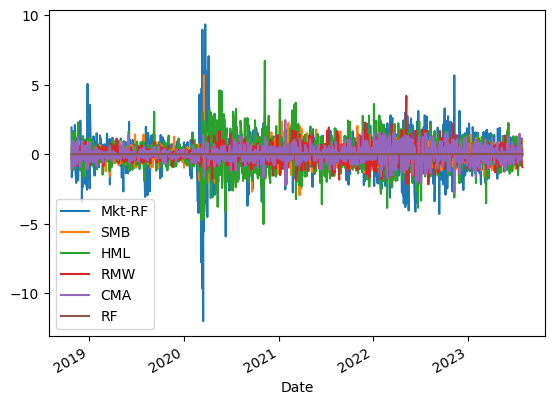

In [6]:
factors_5_df.plot()

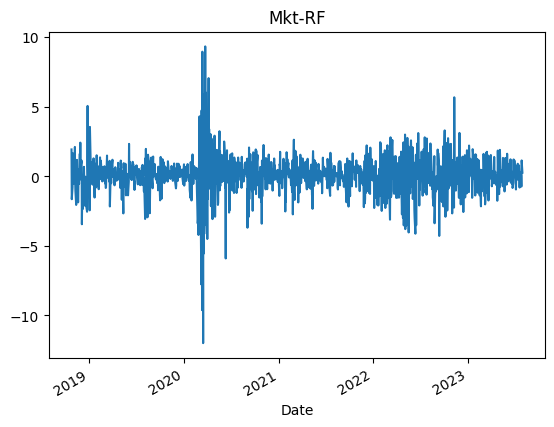

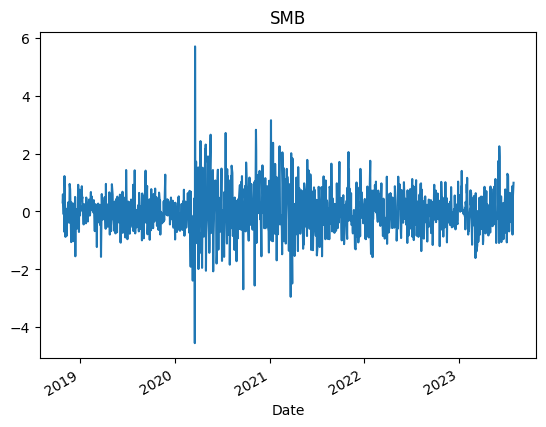

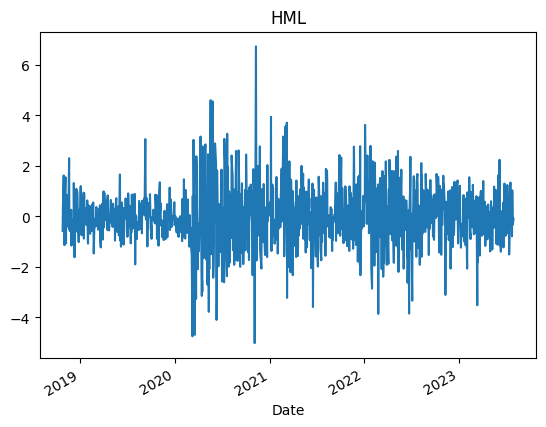

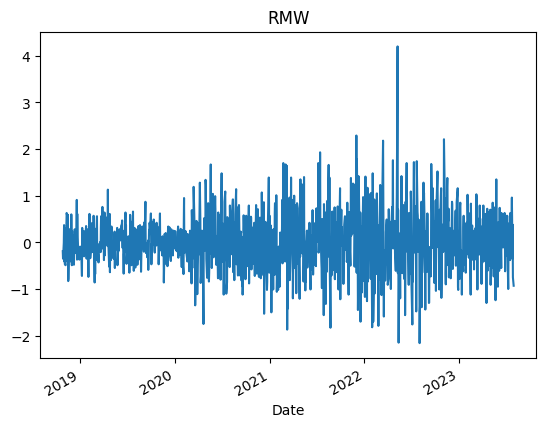

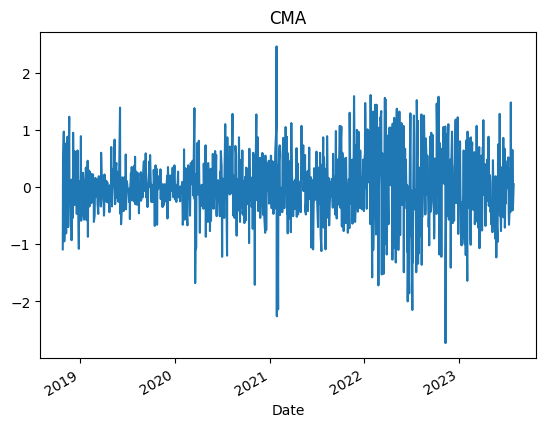

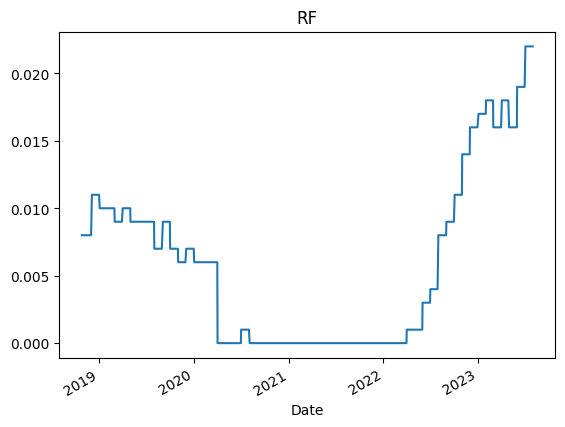

In [7]:
for factor_name in factors_5_df:
  factor= factors_5_df[factor_name]
  factor.plot(title=factor_name)
  plt.show()

In [8]:
factors_5_df_changes = factors_5_df.pct_change()

In [55]:
factors_5_df_changes_cor = factors_5_df_changes.corr()

In [54]:
import seaborn as sns

<Axes: >

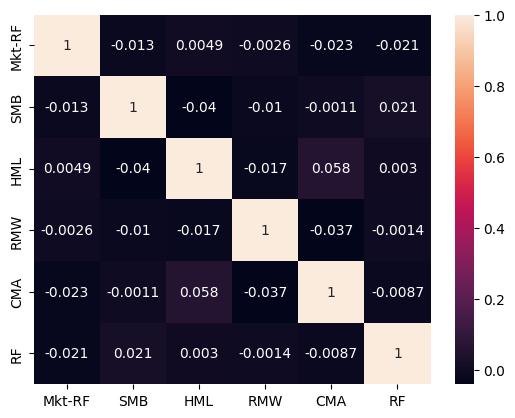

In [57]:
sns.heatmap(factors_5_df_changes_cor, annot = True)

<Axes: >

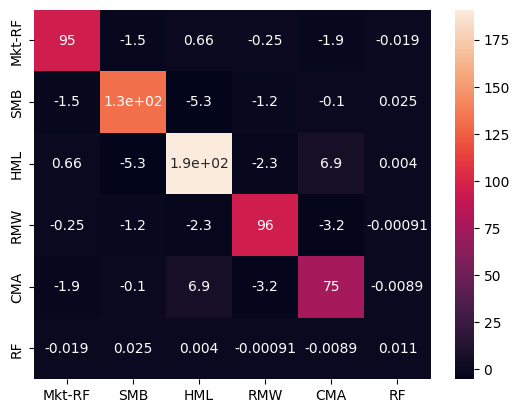

In [58]:
sns.heatmap(factors_5_df_changes.cov(), annot = True)

In [63]:
ten_year_treasury = yf.download('^TNX', start ='2021-01-01', end = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


# Step 3

In [64]:
ten_year_treasury_return = ten_year_treasury.Close.pct_change()

In [90]:
data = factors_3_df.join(ten_year_treasury_return).dropna()
data = data.drop(data[data.Close==0].index)
X= data[['Mkt-RF',	'SMB',	'HML'	]]
y=data.Close.pct_change()[1:]
X=X[1:]
X_train, X_test, y_train, y_test= train_test_split(X,y, shuffle=False)
x = sm.add_constant(X_train)

# performing the regression
# and fitting the model
result = sm.OLS(y_train, X_train).fit()

# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.4016
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                       0.752
Time:                        07:40:16   Log-Likelihood:                         -1206.7
No. Observations:                 369   AIC:                                      2419.
Df Residuals:                     366   BIC:                                      2431.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [91]:
from sklearn.metrics import r2_score
y_pred = result.predict(X_test)
r2_score(y_test, y_pred)

-0.21549969372523226

# Step 4

In [88]:
data = factors_5_df.join(ten_year_treasury_return).dropna()
data = data.drop(data[data.Close==0].index)
X= data[['Mkt-RF',	'SMB',	'HML','RMW'	,'CMA']]
y=data.Close.pct_change()[1:]
X=X[1:]
X_train, X_test, y_train, y_test= train_test_split(X,y, shuffle=False)
x = sm.add_constant(X_train)

# performing the regression
# and fitting the model
result = sm.OLS(y_train, X_train).fit()

# printing the summary table
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.8502
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                       0.515
Time:                        07:40:04   Log-Likelihood:                         -1205.2
No. Observations:                 369   AIC:                                      2420.
Df Residuals:                     364   BIC:                                      2440.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
from sklearn.metrics import r2_score
y_pred = result.predict(X_test)
r2_score(y_test, y_pred)

-0.281995435377395

# Step 5

Using the daily factor data:

(a) Compute the correlation matrix of the factor returns

(b) Compute the covariance matrix of the factor returns

(c) Compare and contrast the 2 matrices, emphasizing any important differences.

In [67]:
import urllib.request
import zipfile
ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"

# Download the FF 5 Factors file from the source
urllib.request.urlretrieve(ff_url,'fama_french.zip')
zip_file = zipfile.ZipFile('fama_french.zip', 'r')
zip_file.extractall()
zip_file.close()

import pandas as pd
ff_factors_raw = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.CSV', skiprows = 3)
print(ff_factors_raw.tail())

       Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
15118    20230725    0.25 -0.23 -0.79  0.47 -0.41  0.022
15119    20230726    0.02  0.87  1.03 -0.35  0.65  0.022
15120    20230727   -0.74 -0.80  0.27  0.38  0.14  0.022
15121    20230728    1.14  0.41 -0.33 -0.75 -0.40  0.022
15122    20230731    0.26  0.99 -0.10 -0.93  0.05  0.022


In [68]:
#Find the relevant index related to the relevant 3 year period from 02 January 2020 to 31 Dec 2022
print(ff_factors_raw.iloc[14220:14980],)

       Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
14220    20191227   -0.10 -0.55 -0.07  0.25  0.10  0.007
14221    20191230   -0.57  0.28  0.56  0.11  0.38  0.007
14222    20191231    0.28  0.01  0.12 -0.12  0.25  0.007
14223    20200102    0.86 -0.97 -0.34  0.24 -0.22  0.006
14224    20200103   -0.67  0.30  0.00 -0.14 -0.10  0.006
...           ...     ...   ...   ...   ...   ...    ...
14975    20221227   -0.51 -0.44  1.42  1.16  1.22  0.016
14976    20221228   -1.23 -0.30 -0.29 -0.96 -0.04  0.016
14977    20221229    1.87  1.03 -1.07 -1.02 -0.82  0.016
14978    20221230   -0.22  0.14 -0.03 -0.54  0.00  0.016
14979    20230103   -0.47  0.05 -0.12  0.25  0.52  0.017

[760 rows x 7 columns]


In [69]:
#Extract the period from 02 January 2020 to 31 Dec 2022
ff_factors = ff_factors_raw.iloc[14223:14979]
print(ff_factors)

       Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
14223    20200102    0.86 -0.97 -0.34  0.24 -0.22  0.006
14224    20200103   -0.67  0.30  0.00 -0.14 -0.10  0.006
14225    20200106    0.36 -0.20 -0.55 -0.17 -0.26  0.006
14226    20200107   -0.19 -0.03 -0.25 -0.12 -0.25  0.006
14227    20200108    0.47 -0.17 -0.64 -0.19 -0.17  0.006
...           ...     ...   ...   ...   ...   ...    ...
14974    20221223    0.51 -0.34  1.16  0.86  0.46  0.016
14975    20221227   -0.51 -0.44  1.42  1.16  1.22  0.016
14976    20221228   -1.23 -0.30 -0.29 -0.96 -0.04  0.016
14977    20221229    1.87  1.03 -1.07 -1.02 -0.82  0.016
14978    20221230   -0.22  0.14 -0.03 -0.54  0.00  0.016

[756 rows x 7 columns]


In [70]:
ff_factors.columns = ["Date", "Mkt-RF", "SMB", "HML", "RMW", "CMA", "RF"]
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'].astype(str), format='%Y-%m-%d', errors='coerce')
print(ff_factors)

            Date  Mkt-RF   SMB   HML   RMW   CMA     RF
14223 2020-01-02    0.86 -0.97 -0.34  0.24 -0.22  0.006
14224 2020-01-03   -0.67  0.30  0.00 -0.14 -0.10  0.006
14225 2020-01-06    0.36 -0.20 -0.55 -0.17 -0.26  0.006
14226 2020-01-07   -0.19 -0.03 -0.25 -0.12 -0.25  0.006
14227 2020-01-08    0.47 -0.17 -0.64 -0.19 -0.17  0.006
...          ...     ...   ...   ...   ...   ...    ...
14974 2022-12-23    0.51 -0.34  1.16  0.86  0.46  0.016
14975 2022-12-27   -0.51 -0.44  1.42  1.16  1.22  0.016
14976 2022-12-28   -1.23 -0.30 -0.29 -0.96 -0.04  0.016
14977 2022-12-29    1.87  1.03 -1.07 -1.02 -0.82  0.016
14978 2022-12-30   -0.22  0.14 -0.03 -0.54  0.00  0.016

[756 rows x 7 columns]


<ipython-input-70-20e419249cea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_factors['Date'] = pd.to_datetime(ff_factors['Date'].astype(str), format='%Y-%m-%d', errors='coerce')


In [71]:
# Compute the correlation matrix
correlation_matrix = ff_factors.corr()

print("The Correlation Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:")
correlation_matrix


The Correlation Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:


<ipython-input-71-6a840200af49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ff_factors.corr()


,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.000000,0.201492,-0.042866,-0.139871,-0.294090,-0.045283
SMB,0.201492,1.000000,0.326014,-0.232876,0.006960,-0.036398
HML,-0.042866,0.326014,1.000000,0.460605,0.644534,-0.022951
RMW,-0.139871,-0.232876,0.460605,1.000000,0.419998,-0.010515
CMA,-0.294090,0.006960,0.644534,0.419998,1.000000,0.022654
RF,-0.045283,-0.036398,-0.022951,-0.010515,0.022654,1.000000


In [72]:
# Compute the covariance matrix
covariance_matrix = ff_factors.cov()

print("The covariance Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:")
covariance_matrix

The covariance Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:


<ipython-input-72-9e182c350cca>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = ff_factors.cov()


,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,2.685211,0.286112,-0.094690,-0.168405,-0.302743,-0.000316
SMB,0.286112,0.750892,0.380822,-0.148269,0.003789,-0.000134
HML,-0.094690,0.380822,1.817165,0.456208,0.545819,-0.000132
RMW,-0.168405,-0.148269,0.456208,0.539852,0.193861,-0.000033
CMA,-0.302743,0.003789,0.545819,0.193861,0.394649,0.000061
RF,-0.000316,-0.000134,-0.000132,-0.000033,0.000061,0.000018


From the correlation matrix, we can determine the direction and strength of correlation among the 5 factors. On the other hand, from the covariance matrix, we can determine the direction as well as the absolution co-variance value among the 5 factors.

Comparing and contrasting between the two matrices, we can conclude that both matrix provides the same direction in terms of correlation among the various factors. However, it can be seen that the (Mk-RF) returns are most affected by SMB factor in the positive direction, and most affected by CMA is the negative direction.

At the same time, we can conclude that the variance of Mkt-RF is the highest, HML factor also has the highest variance, followed by SMB.

# Step 6

Report in tabular form how the extra 2 factors (CMA and RMW) affect the results


In [73]:
print("The covariance Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:")
covariance_matrix

The covariance Matrix among the daily returns of the Fama-French 5 factors for the period 02 January 2020 to 31 December 2022 are given as:


,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,2.685211,0.286112,-0.094690,-0.168405,-0.302743,-0.000316
SMB,0.286112,0.750892,0.380822,-0.148269,0.003789,-0.000134
HML,-0.094690,0.380822,1.817165,0.456208,0.545819,-0.000132
RMW,-0.168405,-0.148269,0.456208,0.539852,0.193861,-0.000033
CMA,-0.302743,0.003789,0.545819,0.193861,0.394649,0.000061
RF,-0.000316,-0.000134,-0.000132,-0.000033,0.000061,0.000018



From the table, we can infer that both CMA and RMW have negative covariance with Mkt-RF, which imples that CMA and RMW move in opposite direction to Mkt-RF. As such, both factors can be suitable as a diversification tool, potentially in order to reduce the variance of Mkt-RF. In particular, the value of the covariance of CMA is higher than RMW, hence if only one is to be chosen as the factor for diversification, CMA could be a more appropriate choice.


# Step 7

## H - Markowitz portfolio optimization

We will first import the 5 asset for our analysis choosing the same time perio

In [74]:
import yfinance as yf
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define the list of 5 stocks
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

# Download historical stock price data
data = yf.download(stocks, start='2020-01-01', end='2022-12-31')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


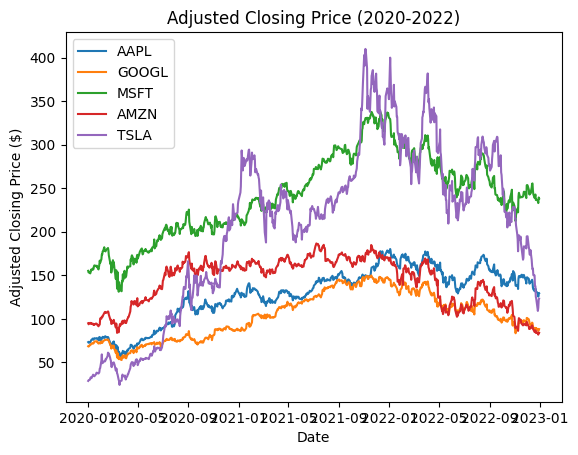

In [75]:
# Create a line plot for each stock
for stock in stocks:
    plt.plot(data[stock], label=stock)

# Set the title and labels for the plot
plt.title('Adjusted Closing Price (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

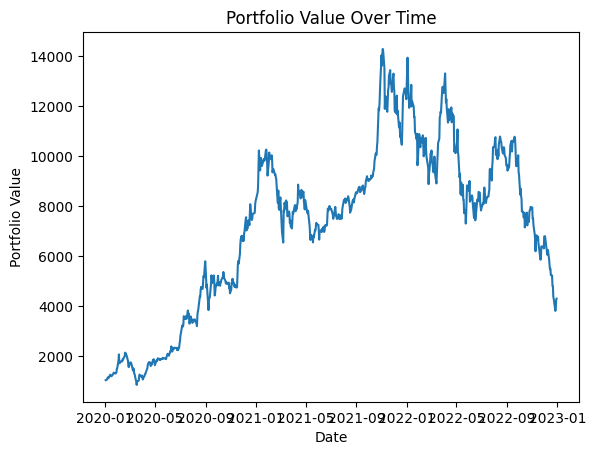

In [76]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Define the number of assets
n_assets = len(stocks)

# Calculate expected returns and covariance matrix
mu = returns.mean().values
cov_matrix = returns.cov().values

# Define the optimization variables
weights = cp.Variable(n_assets)
port_return = mu @ weights
port_variance = cp.quad_form(weights, cov_matrix)

# Define the optimization problem
lambda_param = 0.1  # Adjust this parameter to control the trade-off between risk and return
objective = cp.Maximize(port_return - lambda_param * port_variance)
constraints = [cp.sum(weights) == 1, weights >= 0]
problem = cp.Problem(objective, constraints)

# Solve the optimization problem
problem.solve()

# Get the optimal allocations
optimal_allocations = weights.value

# Calculate the portfolio value over time
initial_value = 1000
portfolio_value = [initial_value]
for i, row in returns.iterrows():
    returns_i = row.values
    portfolio_value_i = portfolio_value[-1] * (1 + np.dot(optimal_allocations, returns_i))
    portfolio_value.append(portfolio_value_i)

# Calculate the ultimate return
ultimate_return = (portfolio_value[-1] - initial_value) / initial_value

# Plot the time series of the portfolio value
dates = returns.index
plt.plot(dates, portfolio_value[1:])
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.show()

In [77]:
# Print the ultimate return
print(f"Ultimate Return: {ultimate_return}")

Ultimate Return: 3.2943801505943657


In [78]:
for i in range(len(stocks)):
    print(f"Stock: {stocks[i]}, Allocation: {optimal_allocations[i]}")

Stock: AAPL, Allocation: 1.3837209881769722e-24
Stock: GOOGL, Allocation: -1.0961407801644907e-22
Stock: MSFT, Allocation: -1.0956368869951894e-22
Stock: AMZN, Allocation: 1.1244653785853715e-22
Stock: TSLA, Allocation: 1.0


# References

https://en.wikipedia.org/wiki/Fama%E2%80%93French_three-factor_model

https://www.bauer.uh.edu/rsusmel/phd/Fama-French_JFE93.pdf
